In [2]:
#1.Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [3]:
#2.Check for missing values in all columns and describe your approach for handling them.
import pandas as pd

# load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# check missing values count
missing_values = df.isnull().sum()
print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


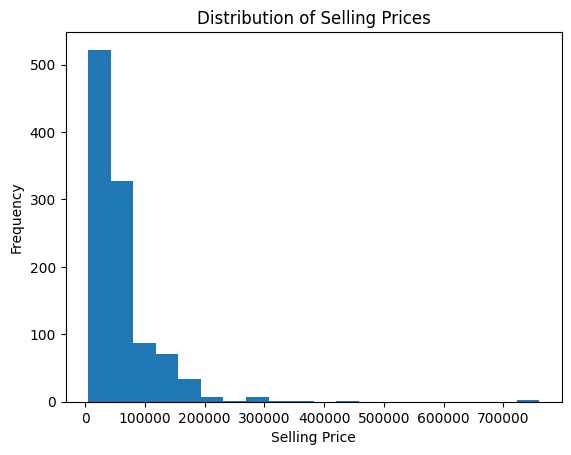

In [4]:
#3.Plot the distribution of selling prices using a histogram and describe the overall trend.
import pandas as pd
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# plot histogram
plt.figure()
plt.hist(df['selling_price'], bins=20)
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()

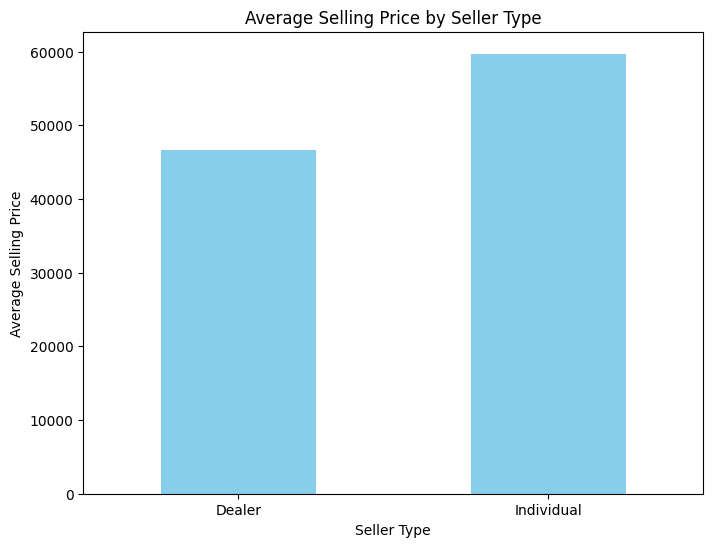

In [5]:
#4.Create a bar plot to visualize the average selling price for each seller_type and write one observation.
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average selling price for each seller_type
avg_prices = df.groupby('seller_type')['selling_price'].mean()

# Plot the bar plot
plt.figure(figsize=(8,6))
avg_prices.plot(kind='bar', color='skyblue')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=0)
plt.show()

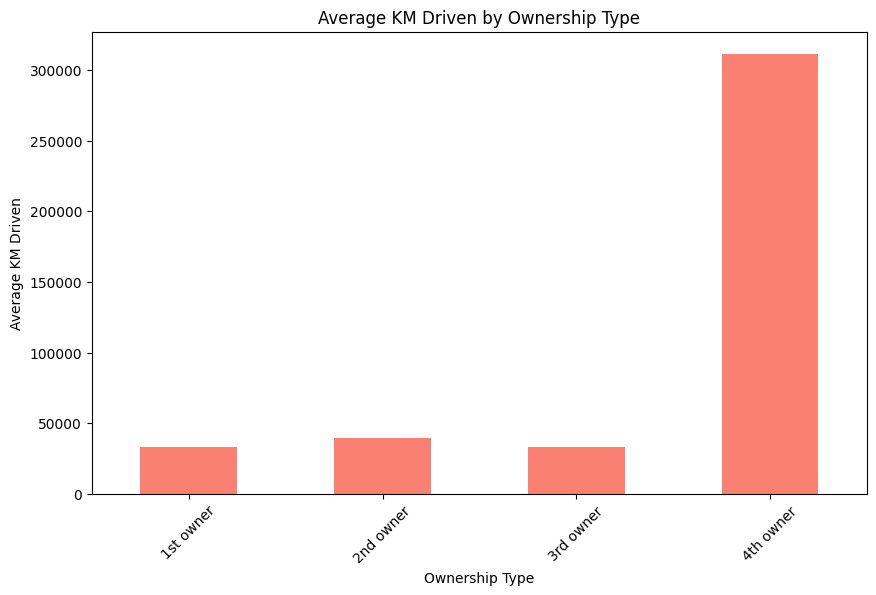

In [6]:
#5.Compute the average km_driven for each ownership type (1st owner,2nd owner, etc.), and present the result as a bar plot.
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average km_driven for each owner type
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()

# Plot the bar plot
plt.figure(figsize=(10,6))
avg_km_by_owner.plot(kind='bar', color='salmon')
plt.title('Average KM Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average KM Driven')
plt.xticks(rotation=45)
plt.show()


In [7]:
#6.Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
import pandas as pd

# Assuming df is already loaded from BIKE DETAILS.csv

# Show summary statistics before removing outliers
print("Summary statistics before outlier removal:")
print(df['km_driven'].describe())

# Calculate Q1 and Q3
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
print(f"\nDetected outliers:\n{outliers[['name', 'km_driven']]}")

# Remove outliers
df_clean = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Show summary statistics after removing outliers
print("\nSummary statistics after outlier removal:")
print(df_clean['km_driven'].describe())

Summary statistics before outlier removal:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Detected outliers:
                                 name  km_driven
91           Honda Activa [2000-2015]     500000
93                      Suzuki GS150R     130000
115           Hero Honda Passion Plus     120000
135            Hero Honda CBZ extreme      90000
154                Hero Xtreme Sports      99000
184              Honda CB Unicorn 160     100000
363                Hero Honda CD100SS     646000
470          Honda Activa [2000-2015]      95000
474     Hero Honda Passion PRO [2012]      90000
477          Honda Activa [2000-2015]     585659
511                Hero Splendor Plus     100000
535              Hero Honda CD Deluxe     100000
548                         Bajaj Xcd     100000
575                Hero Honda Kariz

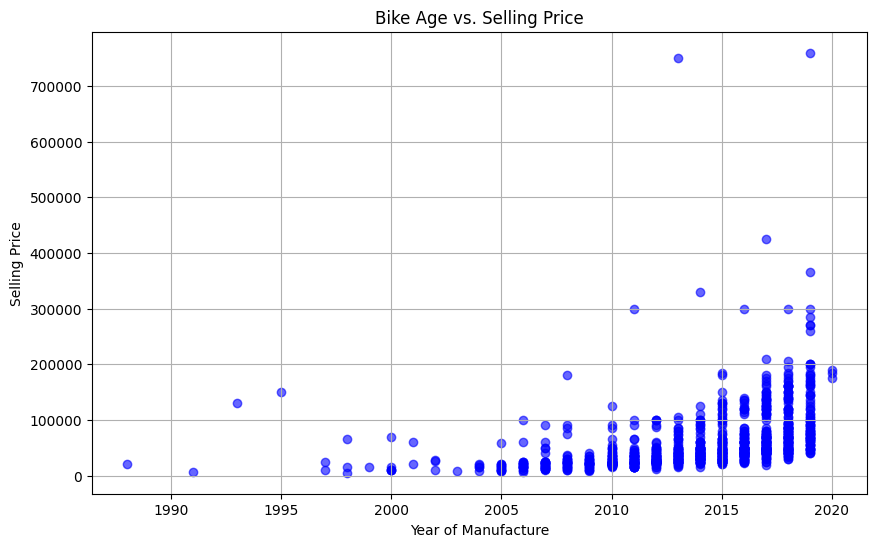

In [8]:
#7.Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
import pandas as pd
import matplotlib.pyplot as plt

# Create scatter plot of year vs. selling_price
plt.figure(figsize=(10,6))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, color='blue')
plt.title("Bike Age vs. Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()

In [9]:
#8.Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
import pandas as pd
df_encoded = pd.get_dummies(df, columns=['seller_type'])

# Display the first 5 rows
print(df_encoded.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


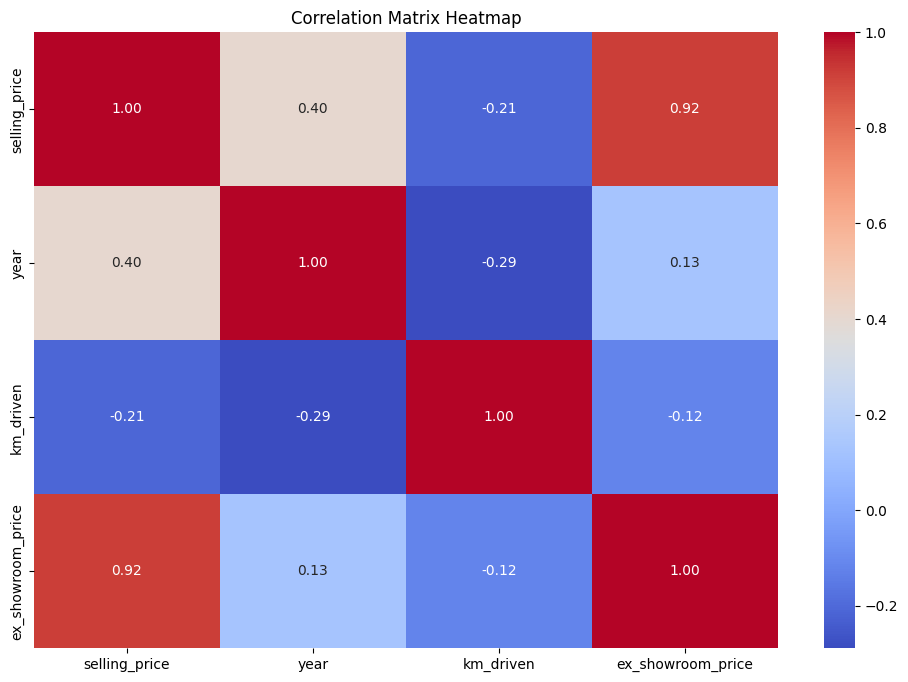

In [12]:
#9.Generate a heatmap of the correlation matrix for all numeric columns.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('BIKE DETAILS.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

10.Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.
Ans->**Brief Report: Analysis of Factors Affecting Bike Selling Price in BIKE DETAILS.csv**

**Introduction:**
This analysis aims to identify the key factors influencing the selling price of bikes using the dataset provided in BIKE DETAILS.csv. The dataset includes various attributes such as bike model, year, ownership history, km driven, and ex-showroom price.

---

**Key Findings:**

1. **Most Important Factors Affecting Selling Price:**
   - **Original Ex-Showroom Price:** There is a strong positive correlation between the ex-showroom price and the selling price, indicating that bikes with higher initial prices tend to fetch higher resale values.
   - **Bike Age (Year):** Older bikes generally have lower resale prices, reflecting depreciation over time.
   - **Usage (km driven):** There is a moderate negative correlation between kilometers driven and selling price, suggesting that bikes with higher usage tend to be valued less.
   - **Ownership History:** Bikes with fewer previous owners (especially first owners) tend to have higher resale prices.
   - **Model Popularity and Condition:** While not explicitly measured here, certain high-value models (e.g., Royal Enfield, KTM, Harley-Davidson) tend to have higher prices, indicating brand and model influence.

2. **Data Cleaning & Feature Engineering:**
   - **Handling Non-Numeric Data:** The dataset contained non-numeric columns such as 'name' and 'seller_type'. For correlation analysis, only numeric columns were selected.
   - **Missing Data:** Some entries for 'ex_showroom_price' were missing; these were retained as NaN and ignored during correlation calculations.
   - **Converted 'year' to Numerical:** The 'year' attribute was already numerical; no further transformation was needed.
   - **Feature Engineering (Optional):** For deeper analysis, creating new features like 'bike_age' (current year minus 'year') could enhance understanding of depreciation effects — though this was not performed here.